In [36]:
# Padronização pelo procedimento z-score da variável Y (comprimento)

# PADRONIZAÇÃO NÃO ALTERA A DISTRIBUIÇÃO!

# PADRONIZAÇÃO NÃO É NORMALIZAÇÃO!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from statstests.tests import shapiro_francia # teste de Shapiro-Francia

df_bebes = pd.read_csv('data/bebes.csv')
df_bebes.head()

,comprimento,idade
0,63.07,19.00
1,65.63,21.00
2,65.63,22.50
3,66.73,22.50
4,66.37,23.25


In [37]:
df_bebes['zcomprimento'] = zscore(df_bebes['comprimento'])

df_bebes.head()

,comprimento,idade,zcomprimento
0,63.07,19.00,-0.301727
1,65.63,21.00,-0.101183
2,65.63,22.50,-0.101183
3,66.73,22.50,-0.015011
4,66.37,23.25,-0.043213


In [38]:
df_bebes['zcomprimento'].describe() # media zero (mean) e desvio padrao 1 (std)

count    7.400000e+01
mean    -2.655533e-16
std      1.006826e+00
min     -2.743512e+00
25%     -8.187557e-01
50%      2.724881e-01
75%      6.960990e-01
max      1.622246e+00
Name: zcomprimento, dtype: float64

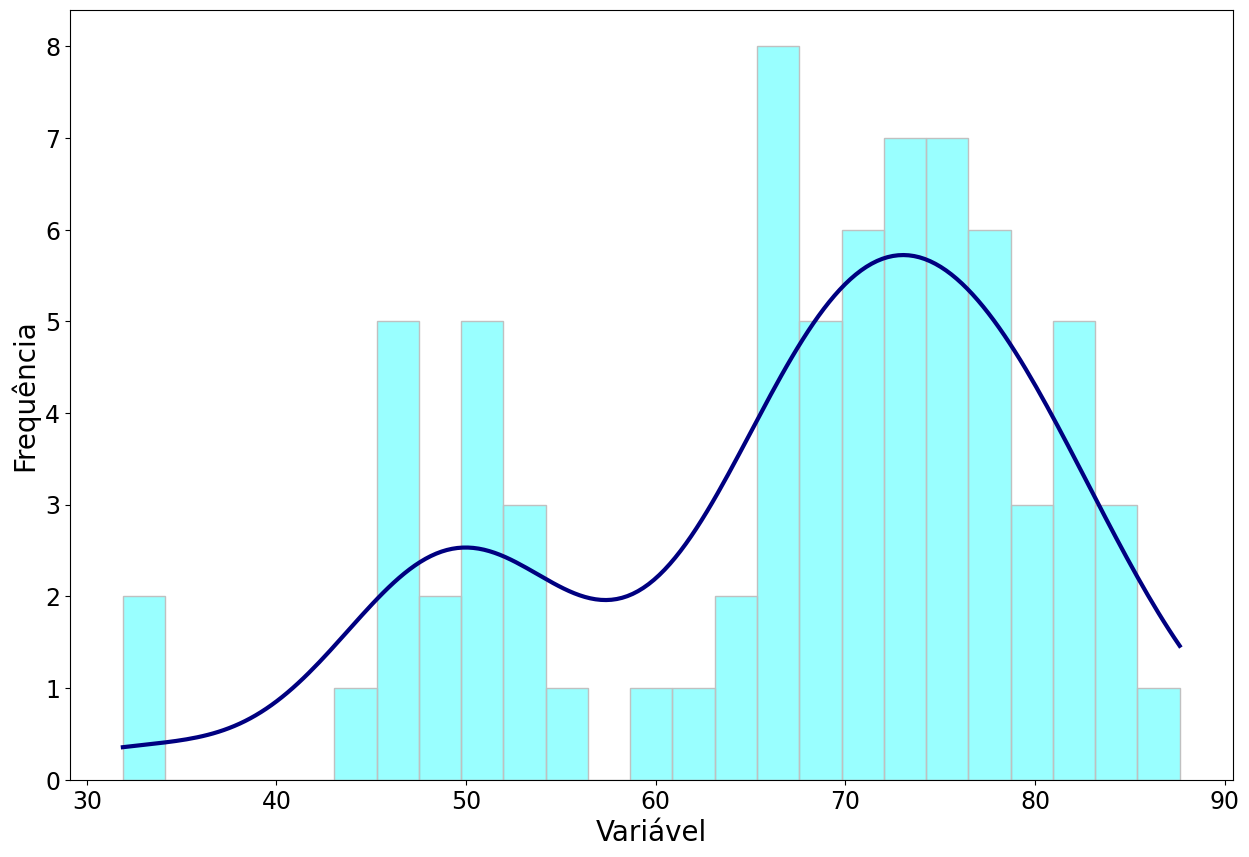

In [39]:
# Histograma da variável original 'comprimento'
plt.figure(figsize=(15,10))
hist1 = sns.histplot(data=df_bebes['comprimento'], kde=True, bins=25,
                     color = 'aqua', alpha=0.4, edgecolor='silver',
                     line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('navy')
plt.xlabel('Variável', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()


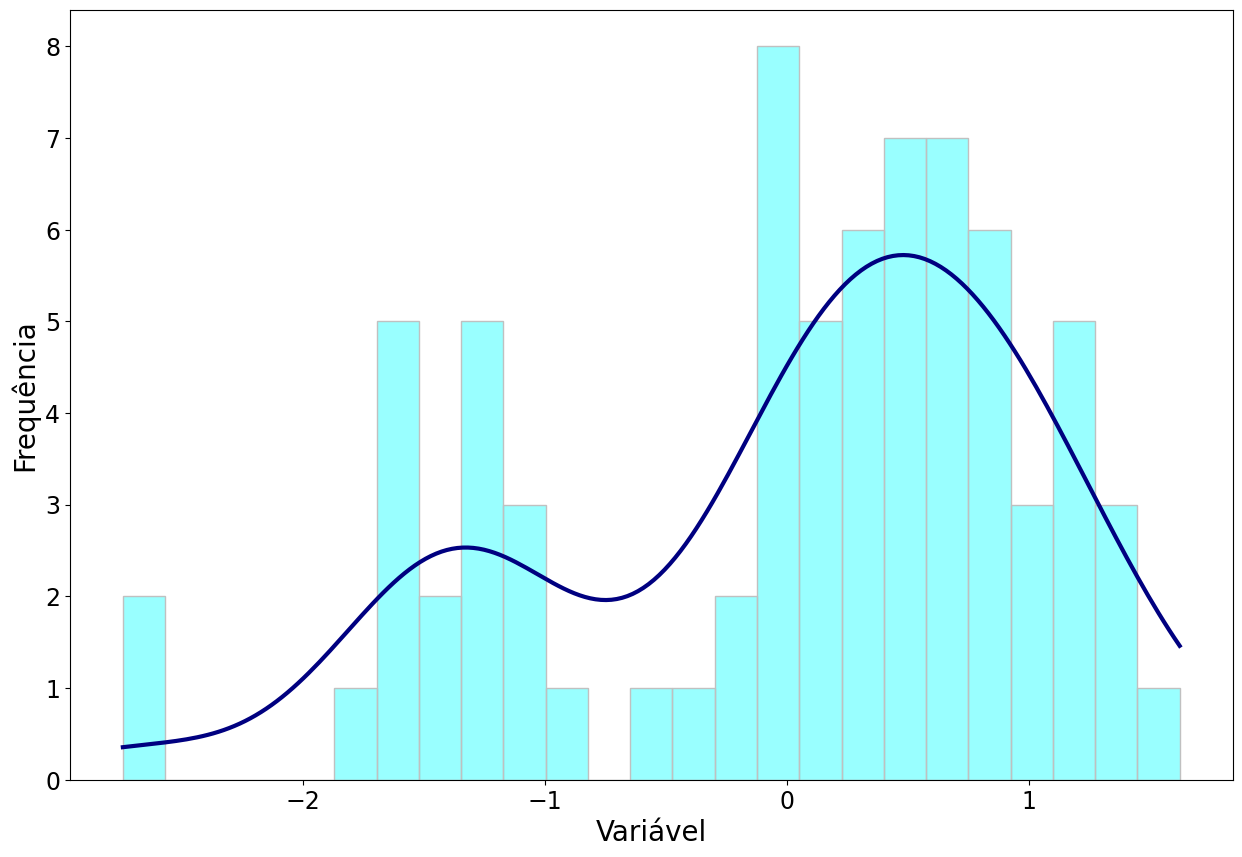

In [40]:
# Histograma da variável original 'zcomprimento'
plt.figure(figsize=(15,10))
hist1 = sns.histplot(data=df_bebes['zcomprimento'], kde=True, bins=25,
                     color = 'aqua', alpha=0.4, edgecolor='silver',
                     line_kws={'linewidth': 3})
hist1.get_lines()[0].set_color('navy')
plt.xlabel('Variável', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

Mesmo histograma! Pq? <br>
Porque padronização não altera a distribuição! <br>
O que altera a distribuição é a **normalização** -> garante que a nova variável tenha aderência à normalidade.

In [41]:
# Teste de Shapiro-Francia da variável 'comprimento'
teste_sf = shapiro_francia(df_bebes['comprimento']) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9242393179099305
statistics z  :  3.2661109119327003
p-value  :  0.0005451776708206652
Statistics W=0.92424, p-value=0.000545
Rejeita-se H0 - Distribuição não aderente à normalidade


In [42]:
# Teste de Shapiro-Francia da variável 'zcomprimento'
teste_sf = shapiro_francia(df_bebes['zcomprimento']) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9242393179099305
statistics z  :  3.2661109119327003
p-value  :  0.0005451776708206652
Statistics W=0.92424, p-value=0.000545
Rejeita-se H0 - Distribuição não aderente à normalidade
